# Data Visualization

In [12]:
# Data processing
# -----------------------------------------------------------------------
import pandas as pd

# Visualization
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate linearity of relationships between variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest
from itertools import combinations

In [4]:
df = pd.read_csv("../data/clean_customer_data.csv")
df.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,...,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,0.0,0.0
1,100018,2017,2,2,2,4,1320,132.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,0.0,0.0
2,100018,2018,10,6,4,10,3110,311.0,385,31,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,0.0,0.0
3,100018,2017,4,4,0,4,924,92.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,0.0,0.0
4,100018,2017,5,0,0,0,0,0.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,0.0,0.0


1. How is the number of flights booked per month during the year distributed?

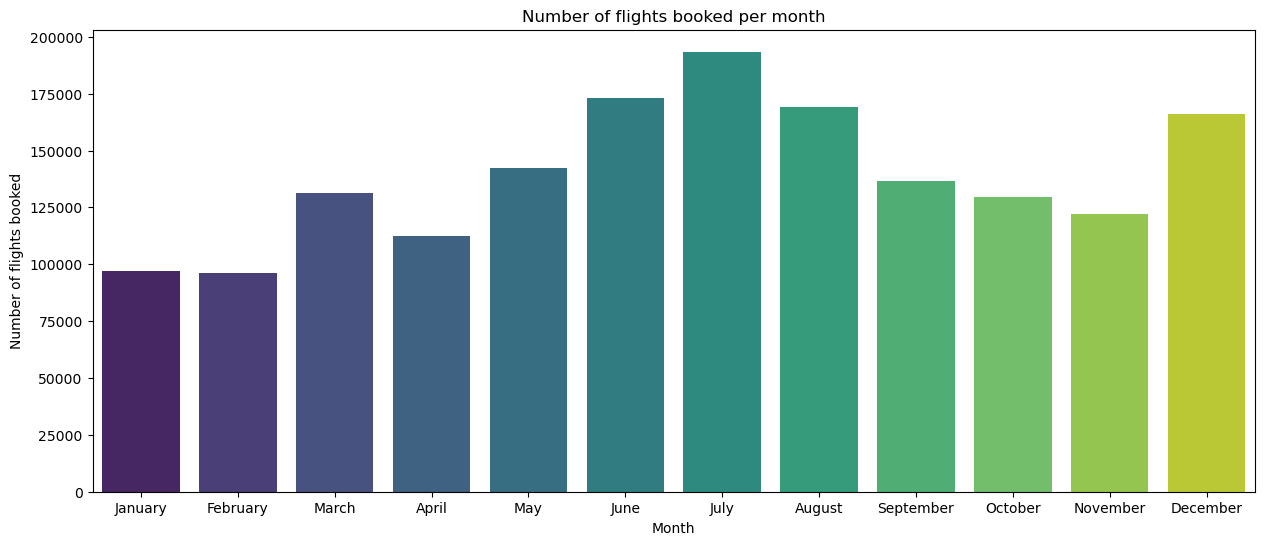

In [8]:
flights_per_month = df.groupby('month')['flights_booked'].sum().sort_index()

plt.figure(figsize=(15, 6))
sns.barplot(x=flights_per_month.index, y=flights_per_month.values, palette="viridis")
plt.title('Number of flights booked per month')
plt.xlabel('Month')
plt.ylabel('Number of flights booked')
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

2. Is there a relationship between the distance of flights and the points accumulated by customers?

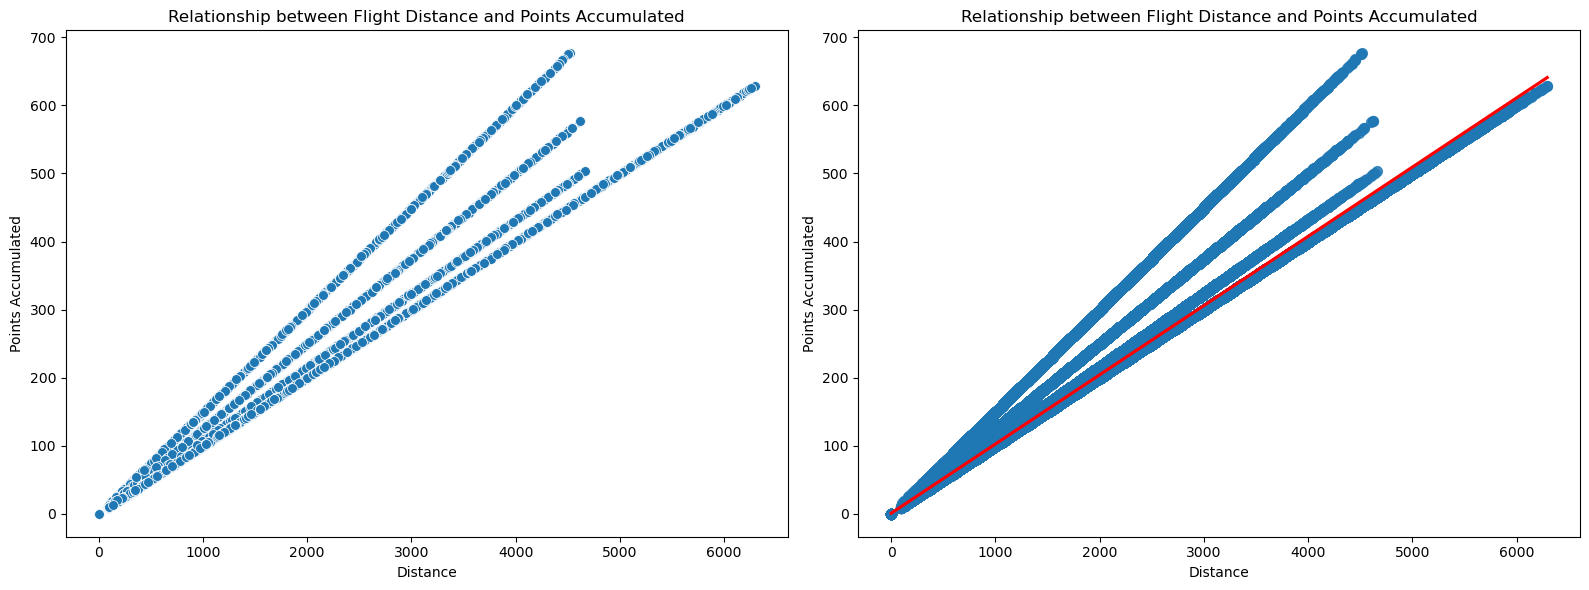

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x='distance', y='points_accumulated', data=df, s=50, ax=axes[0])
axes[0].set_title('Relationship between Flight Distance and Points Accumulated')
axes[0].set_xlabel('Distance')
axes[0].set_ylabel('Points Accumulated')

sns.regplot(x='distance', y='points_accumulated', data=df, scatter_kws={'s':50}, line_kws={'color':'red'}, ax=axes[1])
axes[1].set_title('Relationship between Flight Distance and Points Accumulated')
axes[1].set_xlabel('Distance')
axes[1].set_ylabel('Points Accumulated')

plt.tight_layout()
plt.show()

3. What is the distribution of customers by province or state?

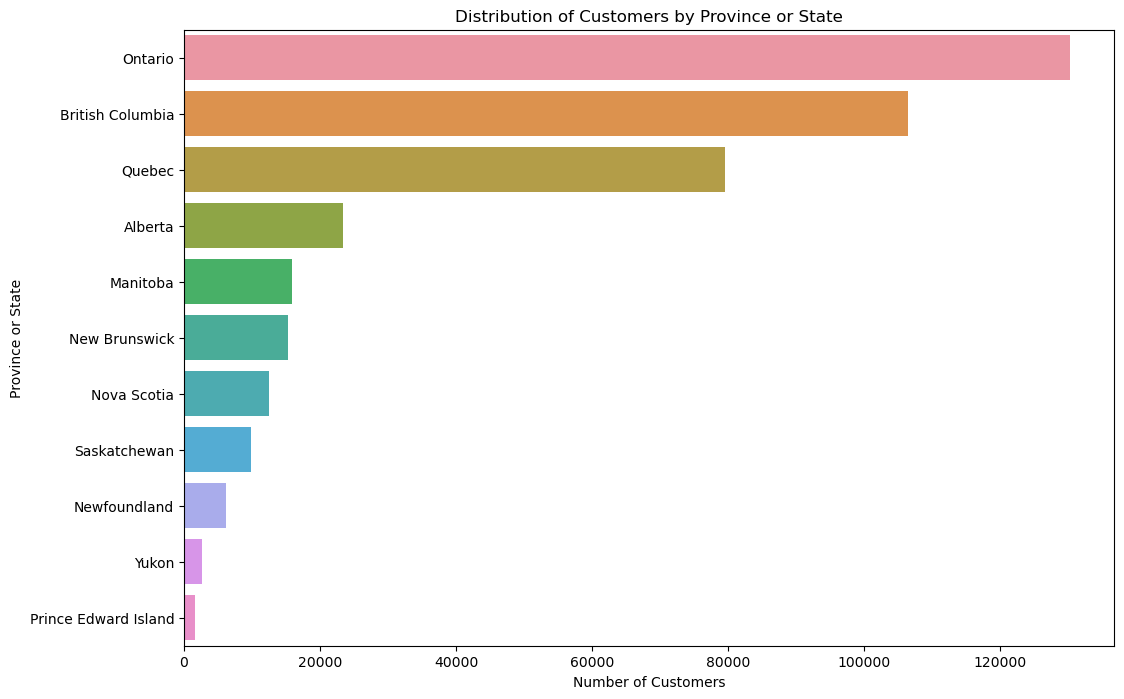

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(y='province', data=df, order=df['province'].value_counts().index)
plt.title('Distribution of Customers by Province or State')
plt.xlabel('Number of Customers')
plt.ylabel('Province or State')
plt.show()

4. How does the average salary compare between the different educational levels of the clients?

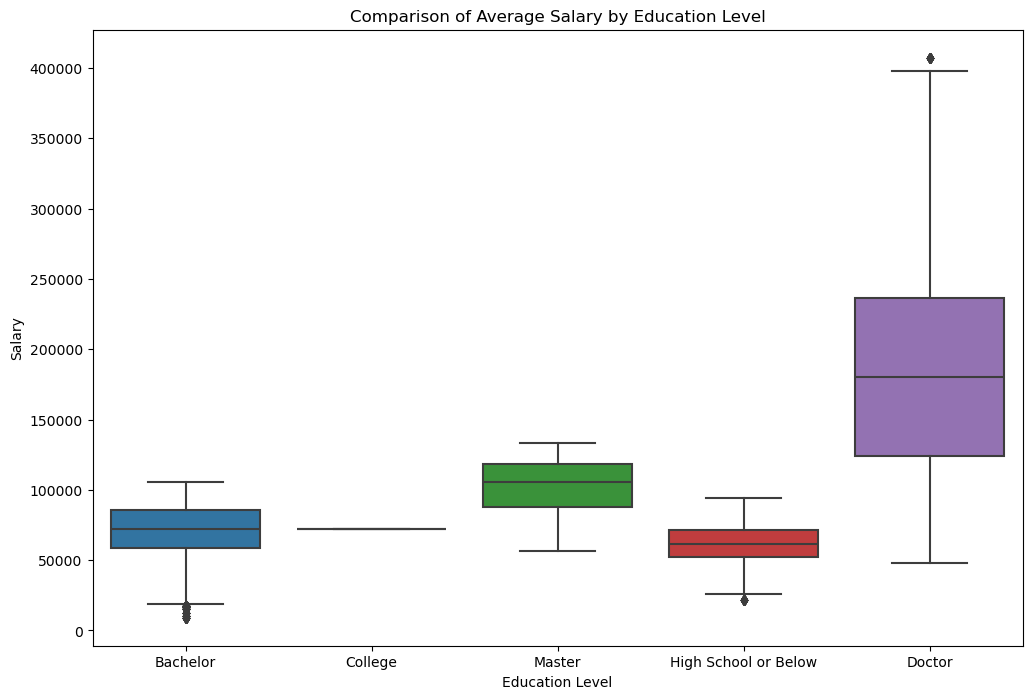

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='education', y='salary', data=df)
plt.title('Comparison of Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()

5. What is the proportion of customers with different types of loyalty cards?

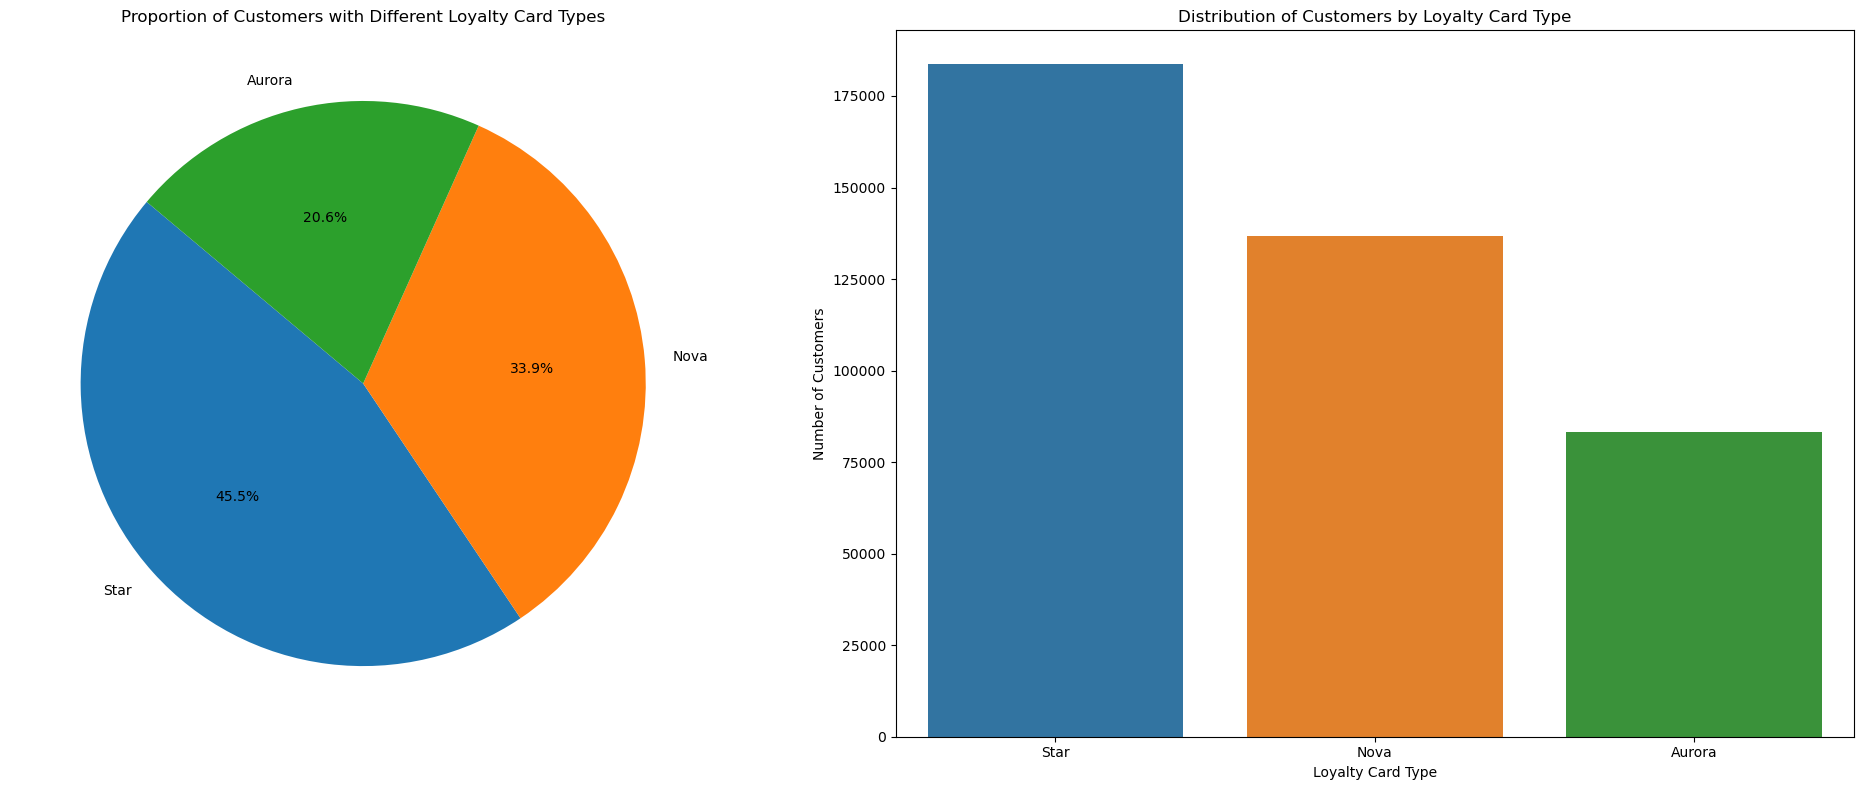

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].pie(df['loyalty_card'].value_counts(), autopct='%1.1f%%', startangle=140, labels=df['loyalty_card'].value_counts().index)
axes[0].set_title('Proportion of Customers with Different Loyalty Card Types')

sns.countplot(x='loyalty_card', data=df, order=df['loyalty_card'].value_counts().index, ax=axes[1])
axes[1].set_title('Distribution of Customers by Loyalty Card Type')
axes[1].set_xlabel('Loyalty Card Type')
axes[1].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

6. How are clients distributed according to marital status and gender?

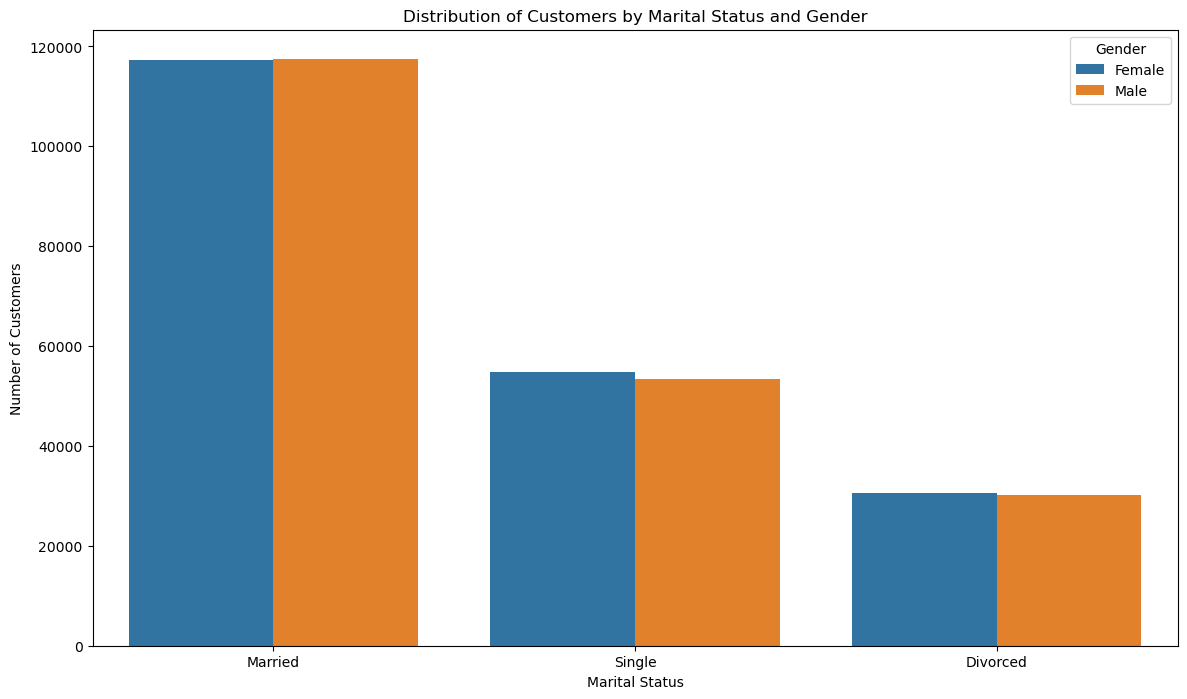

In [24]:
plt.figure(figsize=(14, 8))
sns.countplot(x='marital_status', hue='gender', data=df)
plt.title('Distribution of Customers by Marital Status and Gender')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.show()